In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Data  

In [2]:
df = pd.read_csv('./arrests.csv')

In [3]:
df.head()

,Border,Sector,State/Territory,2000 (All Illegal Immigrants),2000 (Mexicans Only),2001 (All Illegal Immigrants),2001 (Mexicans Only),2002 (All Illegal Immigrants),2002 (Mexicans Only),2003 (All Illegal Immigrants),...,2012 (All Illegal Immigrants),2012 (Mexicans Only),2013 (All Illegal Immigrants),2013 (Mexicans Only),2014 (All Illegal Immigrants),2014 (Mexicans Only),2015 (All Illegal Immigrants),2015 (Mexicans Only),2016 (All Illegal Immigrants),2016 (Mexicans Only)
0,Coast,Livermore,CA,6205,6034,5211,5007,4371,4186,3565,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Coast,Miami,"FL, GA, SC, NC",6237,2421,5962,1590,5143,1825,5931,...,2509.0,831.0,1738.0,388.0,2034.0,277.0,1752.0,273.0,3205.0,652.0
2,Coast,New Orleans,"LA, AL, MS, FL",6478,5985,5033,4616,4665,4126,5151,...,474.0,277.0,500.0,262.0,950.0,465.0,849.0,394.0,764.0,388.0
3,Coast,Ramey,PR,1731,0,1952,0,835,0,1688,...,702.0,0.0,924.0,3.0,958.0,0.0,557.0,1.0,694.0,0.0
4,Coast,All,"PR, LA, AL, MS, FL, GA, SC, NC",20651,14440,18158,11213,15014,10137,16335,...,3685.0,1108.0,3162.0,653.0,3942.0,742.0,3158.0,668.0,4663.0,1040.0


## Exploratory Analysis

In [5]:

# Check the shape of the DataFrame
print(df.shape)

# Check the data types of the columns
print(df.dtypes)

(25, 37)
Border                            object
Sector                            object
State/Territory                   object
2000 (All Illegal Immigrants)      int64
2000 (Mexicans Only)               int64
2001 (All Illegal Immigrants)      int64
2001 (Mexicans Only)               int64
2002 (All Illegal Immigrants)      int64
2002 (Mexicans Only)               int64
2003 (All Illegal Immigrants)      int64
2003 (Mexicans Only)               int64
2004 (All Illegal Immigrants)      int64
2004 (Mexicans Only)               int64
2005 (All Illegal Immigrants)      int64
2005 (Mexicans Only)               int64
2006 (All Illegal Immigrants)    float64
2006 (Mexicans Only)             float64
2007 (All Illegal Immigrants)    float64
2007 (Mexicans Only)             float64
2008 (All Illegal Immigrants)    float64
2008 (Mexicans Only)             float64
2009 (All Illegal Immigrants)    float64
2009 (Mexicans Only)             float64
2010 (All Illegal Immigrants)    float64
2010 (M

In [6]:
print(df.isnull().sum())


Border                           0
Sector                           1
State/Territory                  0
2000 (All Illegal Immigrants)    0
2000 (Mexicans Only)             0
2001 (All Illegal Immigrants)    0
2001 (Mexicans Only)             0
2002 (All Illegal Immigrants)    0
2002 (Mexicans Only)             0
2003 (All Illegal Immigrants)    0
2003 (Mexicans Only)             0
2004 (All Illegal Immigrants)    0
2004 (Mexicans Only)             0
2005 (All Illegal Immigrants)    0
2005 (Mexicans Only)             0
2006 (All Illegal Immigrants)    1
2006 (Mexicans Only)             1
2007 (All Illegal Immigrants)    1
2007 (Mexicans Only)             1
2008 (All Illegal Immigrants)    1
2008 (Mexicans Only)             1
2009 (All Illegal Immigrants)    1
2009 (Mexicans Only)             1
2010 (All Illegal Immigrants)    1
2010 (Mexicans Only)             1
2011 (All Illegal Immigrants)    1
2011 (Mexicans Only)             1
2012 (All Illegal Immigrants)    1
2012 (Mexicans Only)

In [7]:
df.describe()

,2000 (All Illegal Immigrants),2000 (Mexicans Only),2001 (All Illegal Immigrants),2001 (Mexicans Only),2002 (All Illegal Immigrants),2002 (Mexicans Only),2003 (All Illegal Immigrants),2003 (Mexicans Only),2004 (All Illegal Immigrants),2004 (Mexicans Only),...,2012 (All Illegal Immigrants),2012 (Mexicans Only),2013 (All Illegal Immigrants),2013 (Mexicans Only),2014 (All Illegal Immigrants),2014 (Mexicans Only),2015 (All Illegal Immigrants),2015 (Mexicans Only),2016 (All Illegal Immigrants),2016 (Mexicans Only)
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,25.000000,25.000000,25.000000,2.500000e+01,2.500000e+01,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2.011726e+05,1.964260e+05,1.519457e+05,1.468856e+05,114637.200000,110159.160000,111786.840000,105841.440000,1.392474e+05,1.302007e+05,...,45596.000000,33219.375000,52598.625000,33466.750000,60831.375000,28647.250000,42139.625000,23515.250000,51977.000000,24121.125000
std,4.582761e+05,4.496808e+05,3.444285e+05,3.352432e+05,259193.176601,250805.001345,253413.503267,242014.255623,3.204389e+05,3.022915e+05,...,101838.754488,74677.633688,118912.310383,75502.344406,140674.392249,64232.919606,95400.524815,52365.972416,117687.440682,53503.756175
min,4.890000e+02,0.000000e+00,6.850000e+02,0.000000e+00,432.000000,0.000000,292.000000,0.000000,2.630000e+02,3.000000e+00,...,41.000000,0.000000,37.000000,1.000000,45.000000,0.000000,32.000000,1.000000,25.000000,0.000000
25%,1.957000e+03,1.375000e+03,2.089000e+03,1.214000e+03,1511.000000,1068.000000,1688.000000,1009.000000,1.813000e+03,8.440000e+02,...,660.750000,275.250000,523.250000,255.750000,717.500000,262.500000,503.000000,149.000000,451.500000,132.250000
50%,1.210800e+04,7.362000e+03,1.208700e+04,7.444000e+03,10487.000000,6095.000000,10157.000000,5947.000000,9.959000e+03,5.495000e+03,...,3824.500000,1707.000000,3196.000000,1162.500000,3640.000000,1203.500000,2892.000000,1052.500000,3934.000000,1104.500000
75%,1.332430e+05,1.225010e+05,1.078440e+05,1.002650e+05,89927.000000,78588.000000,77749.000000,62830.000000,9.294700e+04,7.374100e+04,...,25052.250000,23710.000000,24506.500000,17911.500000,25669.000000,16018.250000,20832.250000,14557.250000,27198.250000,17105.000000
max,1.676438e+06,1.636883e+06,1.266214e+06,1.224047e+06,955310.000000,917993.000000,931557.000000,882012.000000,1.160395e+06,1.085006e+06,...,364768.000000,265755.000000,420789.000000,267734.000000,486651.000000,229178.000000,337117.000000,188122.000000,415816.000000,192969.000000


<Axes: xlabel='2000 (All Illegal Immigrants)', ylabel='Count'>

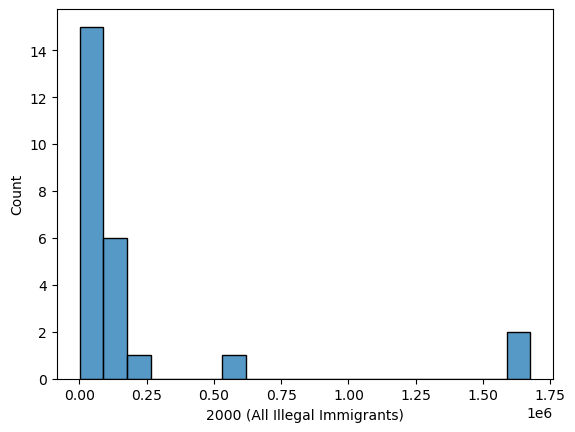

In [9]:
sns.histplot(df['2000 (All Illegal Immigrants)'], kde=False)

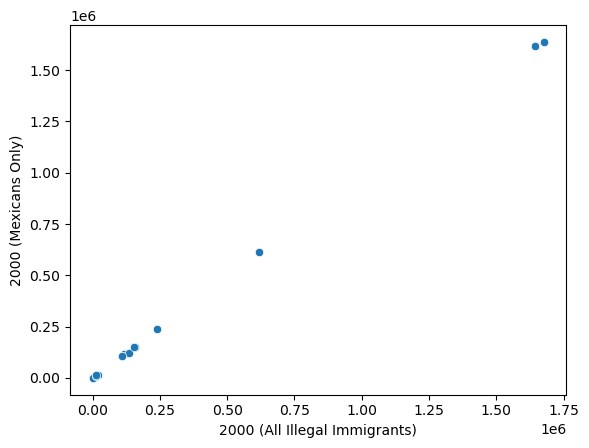

In [10]:
sns.scatterplot(data=df, x='2000 (All Illegal Immigrants)', y='2000 (Mexicans Only)')
plt.show()

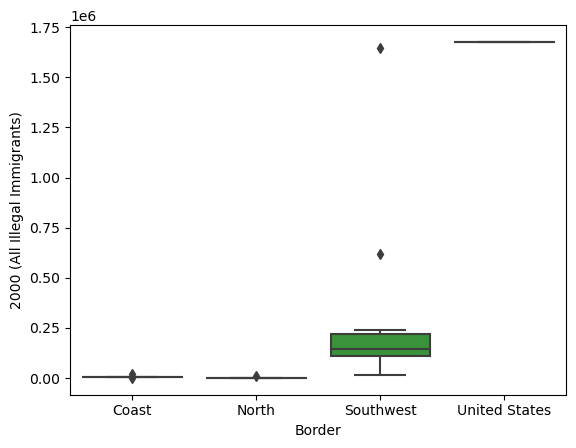

In [11]:
sns.boxplot(data=df, x='Border', y='2000 (All Illegal Immigrants)')
plt.show()

/var/folders/4l/5llz04z14rxb2zg9mvtwsq1h0000gn/T/ipykernel_57310/2963150820.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Border', y='2000 (All Illegal Immigrants)', ci=None)


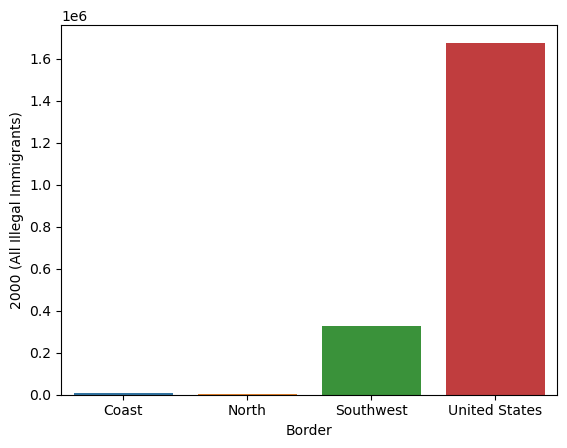

In [12]:
sns.barplot(data=df, x='Border', y='2000 (All Illegal Immigrants)', ci=None)
plt.show()

## Train and Predict

In [23]:
df.dropna(inplace=True)

In [24]:
# Split data into features and target
X = df.drop('2016 (All Illegal Immigrants)', axis=1)
y = df['2016 (All Illegal Immigrants)']

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
num_features = ['2000 (All Illegal Immigrants)', '2000 (Mexicans Only)', '2001 (All Illegal Immigrants)', '2001 (Mexicans Only)', '2002 (All Illegal Immigrants)', '2002 (Mexicans Only)', '2003 (All Illegal Immigrants)', '2003 (Mexicans Only)', '2004 (All Illegal Immigrants)', '2004 (Mexicans Only)', '2005 (All Illegal Immigrants)', '2005 (Mexicans Only)', '2006 (All Illegal Immigrants)', '2006 (Mexicans Only)', '2007 (All Illegal Immigrants)', '2007 (Mexicans Only)', '2008 (All Illegal Immigrants)', '2008 (Mexicans Only)', '2009 (All Illegal Immigrants)', '2009 (Mexicans Only)', '2010 (All Illegal Immigrants)', '2010 (Mexicans Only)', '2011 (All Illegal Immigrants)', '2011 (Mexicans Only)', '2012 (All Illegal Immigrants)', '2012 (Mexicans Only)', '2013 (All Illegal Immigrants)', '2013 (Mexicans Only)', '2014 (All Illegal Immigrants)', '2014 (Mexicans Only)', '2015 (All Illegal Immigrants)', '2015 (Mexicans Only)']
cat_features = ['Border', 'Sector', 'State/Territory']
num_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features), ('cat', cat_transformer, cat_features)])

In [27]:
# Define random forest regressor model
model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])

In [28]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['2000 (All Illegal '
                                                   'Immigrants)',
                                                   '2000 (Mexicans Only)',
                                                   '2001 (All Illegal '
                                                   'Immigrants)',
                                                   '2001 (Mexicans Only)',
                                                   '2002 (All Illegal '
                                                   'Immigrants)',
                                                   '2002 (Mexicans Only)',
                                                   '2003 (All Illegal '
                                                   'Immigrants)',...
                                                   'Immigrants)',
                                                   '2012 (Mexicans Only)',
                                                   '2013 (All Illegal '
                                                   'Immigrants)',
                                                   '2013 (Mexicans Only)',
                                                   '2014 (All Illegal '
                                                   'Immigrants)',
                                                   '2014 (Mexicans Only)', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Border', 'Sector',
                                                   'State/Territory'])])),
                ('regressor', RandomForestRegressor())])

In [29]:
# Evaluate model on testing data
score = model.score(X_test, y_test)
print(f"Model accuracy: {score:.2f}")

Model accuracy: 0.85


In [30]:
y_pred = model.predict(X_test)

In [31]:
score = r2_score(y_test, y_pred)
print('R-squared score:', score)

R-squared score: 0.8492685086180514
